<a href="https://colab.research.google.com/github/chintans/DL-Week1/blob/main/ReLU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ReLU Activation Function & Derivative Example - Object Detection
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Generate synthetic "feature activations" from a CNN layer
# Positive = important features, Negative = unimportant/noisy
np.random.seed(42)
important_features = np.random.uniform(1, 5, size=20)   # strong detections
unimportant_features = np.random.uniform(-3, 0, size=20)  # noise
features = np.concatenate([important_features, unimportant_features])

In [3]:
# 2. Define ReLU and its derivative
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

In [4]:
# 3. Apply ReLU and derivative
relu_outputs = relu(features)
relu_grads = relu_derivative(features)

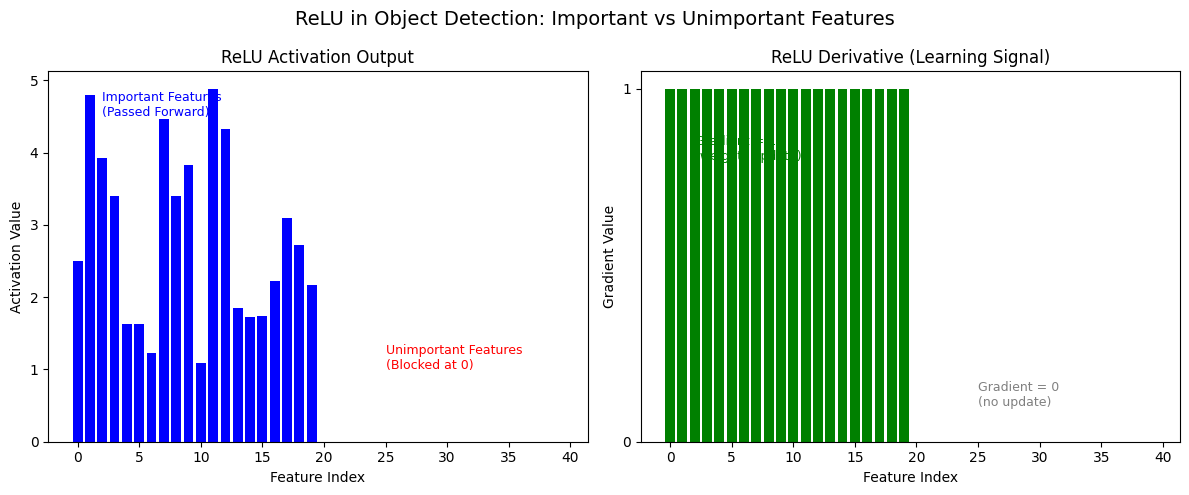

In [5]:
# 4. Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot ReLU outputs
axes[0].bar(range(len(features)), relu_outputs,
            color=["blue" if f > 0 else "red" for f in features])
axes[0].set_title("ReLU Activation Output")
axes[0].set_xlabel("Feature Index")
axes[0].set_ylabel("Activation Value")
axes[0].axhline(0, color='black', linewidth=0.7)
axes[0].text(2, 4.5, "Important Features\n(Passed Forward)", color="blue", fontsize=9)
axes[0].text(25, 1, "Unimportant Features\n(Blocked at 0)", color="red", fontsize=9)

# Plot ReLU derivatives
axes[1].bar(range(len(features)), relu_grads,
            color=["green" if f > 0 else "gray" for f in features])
axes[1].set_title("ReLU Derivative (Learning Signal)")
axes[1].set_xlabel("Feature Index")
axes[1].set_ylabel("Gradient Value")
axes[1].set_yticks([0, 1])
axes[1].text(2, 0.8, "Gradient = 1\n(weights update)", color="green", fontsize=9)
axes[1].text(25, 0.1, "Gradient = 0\n(no update)", color="gray", fontsize=9)

plt.suptitle("ReLU in Object Detection: Important vs Unimportant Features", fontsize=14)
plt.tight_layout()
plt.show()

In [6]:
def predict(features):
  """Applies the ReLU activation function to the input features."""
  return relu(features)

# Example usage:
# Let's use the 'features' data generated earlier for demonstration
predictions = predict(features)

print("Original Features:")
print(features)
print("\nPredictions (ReLU Output):")
print(predictions)

Original Features:
[ 2.49816048  4.80285723  3.92797577  3.39463394  1.62407456  1.62397808
  1.23233445  4.46470458  3.40446005  3.83229031  1.08233798  4.87963941
  4.32977056  1.84935644  1.72729987  1.73361804  2.21696897  3.09902573
  2.72778007  2.16491656 -1.16444132 -2.58151842 -2.12356605 -1.90091447
 -1.63179005 -0.64447212 -2.40097865 -1.45729668 -1.22275629 -2.86064876
 -1.17736544 -2.48842763 -2.80484522 -0.15334339 -0.1031039  -0.57480796
 -2.08615869 -2.70698366 -0.94730092 -1.67954252]

Predictions (ReLU Output):
[2.49816048 4.80285723 3.92797577 3.39463394 1.62407456 1.62397808
 1.23233445 4.46470458 3.40446005 3.83229031 1.08233798 4.87963941
 4.32977056 1.84935644 1.72729987 1.73361804 2.21696897 3.09902573
 2.72778007 2.16491656 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
